## Pre-processing the image data in an appropriate format to be used 

### Download link: http://ufldl.stanford.edu/housenumbers/

### Load the data in .mat format, pre-process it:

* Convert imgaes to greyscale  
* Nomalize image pixels/features
* Flatten images
* Create one-hot labels 
* Save in pickle format so it can be loaded and used 



In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import random
import os
%matplotlib inline

In [2]:
#load datasets
train_data = loadmat('Dataset/Mat files/train_32x32.mat')
test_data = loadmat('Dataset/Mat files/test_32x32.mat')

# Pre-process the training data

In [3]:
type(train_data)

dict

In [4]:
train_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
print(train_data['__header__'])
print(train_data['__version__'])

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011'
1.0


In [6]:
type(train_data['X'])

numpy.ndarray

In [7]:
type(train_data['y'])

numpy.ndarray

In [8]:
train_data['X']

array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223, 186]]],


       [[[ 28,  85,  21, ...,  92, 183, 204],
         [ 39,  77,  53, ...,  78, 182, 205],
         [ 35,  61, 110, ..., 103, 186, 202]],

    

In [9]:
print(train_data['X'].shape) # dimensions, chanels, samples

(32, 32, 3, 73257)


In [10]:
train_data['X'][:, :, :, 0].shape #first image.... (dimensions, channels)

(32, 32, 3)

In [11]:
train_data['X'][:, :, :, 0][:,:,0].shape # first image, 1 channel 

(32, 32)

In [12]:
print(train_data['y'])
print(train_data['y'].shape)

[[1]
 [9]
 [2]
 ...
 [1]
 [6]
 [9]]
(73257, 1)


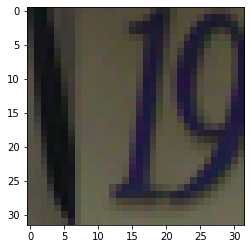

In [16]:
plt.imshow(train_data['X'][:, :, :, 0]) # showing the first image (ALL 3 Channels)
plt.savefig('digit_sample.png')
plt.show()

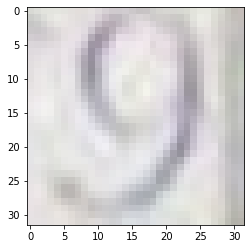

In [14]:
plt.imshow(train_data['X'][:, :, :, -1]) # showing the last image (ALL 3 Channels)
plt.show()

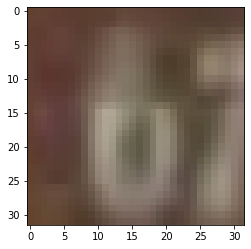

In [15]:
plt.imshow(test_data['X'][:, :, :, -2]) # showing the first image (ALL 3 Channels)
plt.show()

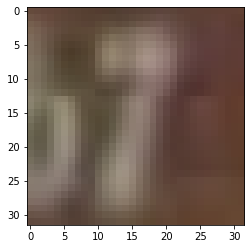

In [16]:
plt.imshow(test_data['X'][:, :, :, -1]) # showing the first image (ALL 3 Channels)
plt.show()

# Save images as rgb.png files


In [17]:
train_data['X'].shape[3]

73257

In [18]:
#save training images
import scipy.misc
image_no = 1
for i in range(train_data['X'].shape[3]):
    scipy.misc.imsave('Dataset/RGB_images/train/outfile'+ str(image_no) +'.jpg', train_data['X'][:,:,:,i])
    image_no+=1
    #print(image_no)
print('Number of images saved: ',i)

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


Number of images saved:  73256


In [19]:
test_data['X'].shape[3]

26032

In [20]:
#save testing images
import scipy.misc
image_no = 1
for i in range(test_data['X'].shape[3]):
    scipy.misc.imsave('Dataset/RGB_images/test/outfile'+ str(image_no) +'.jpg', test_data['X'][:,:,:,i])
    image_no+=1
    #print(image_no)
print('Number of images saved: ',i)

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


Number of images saved:  26031


## Load images as greyscale  and save them

In [21]:
from PIL import Image
import pandas as pd

In [22]:
#load all train images and save as greyscale
image_no = 1
for i in range(train_data['X'].shape[3]):
    img = Image.open('Dataset/RGB_images/train/outfile'+ str(image_no)+'.jpg').convert('LA')
    img.save('Dataset/Greyscale_images/train/outfile'+str(image_no)+'.png')
    image_no+=1

In [23]:
#load all test images and save asgreyscale
image_no = 1
for i in range(test_data['X'].shape[3]):
    img = Image.open('Dataset/RGB_images/test/outfile'+ str(image_no)+'.jpg').convert('LA')
    img.save('Dataset/Greyscale_images/test/outfile'+str(image_no)+'.png')
    image_no+=1

### Read in greyscale images as pixels

In [24]:
import imageio

In [25]:
#import train set
train_images_array=[]
image_no = 1
for i in range(train_data['X'].shape[3]):
    img = imageio.imread('Dataset/Greyscale_images/train/outfile'+str(image_no)+'.png')
    train_images_array.append(img)
    image_no+=1

In [26]:
len(train_images_array)

73257

In [27]:
train_images_array[0]

Array([[[ 31,  31,  31, 255],
        [ 20,  20,  20, 255],
        [ 19,  19,  19, 255],
        ...,
        [ 61,  61,  61, 255],
        [ 71,  71,  71, 255],
        [ 82,  82,  82, 255]],

       [[ 34,  34,  34, 255],
        [ 20,  20,  20, 255],
        [ 19,  19,  19, 255],
        ...,
        [ 42,  42,  42, 255],
        [ 59,  59,  59, 255],
        [ 76,  76,  76, 255]],

       [[ 39,  39,  39, 255],
        [ 20,  20,  20, 255],
        [ 19,  19,  19, 255],
        ...,
        [ 32,  32,  32, 255],
        [ 46,  46,  46, 255],
        [ 62,  62,  62, 255]],

       ...,

       [[ 85,  85,  85, 255],
        [ 77,  77,  77, 255],
        [ 77,  77,  77, 255],
        ...,
        [100, 100, 100, 255],
        [101, 101, 101, 255],
        [102, 102, 102, 255]],

       [[ 82,  82,  82, 255],
        [ 83,  83,  83, 255],
        [ 76,  76,  76, 255],
        ...,
        [102, 102, 102, 255],
        [102, 102, 102, 255],
        [102, 102, 102, 255]],

       [[ 78

In [28]:
train_images_array[0].shape

(32, 32, 4)

In [29]:
#import test set
test_images_array=[]
image_no = 1
for i in range(test_data['X'].shape[3]):
    img = imageio.imread('Dataset/Greyscale_images/test/outfile'+str(image_no)+'.png')
    test_images_array.append(img)
    image_no+=1

In [30]:
len(test_images_array)

26032

In [31]:
test_images_array[0].shape

(32, 32, 4)

In [32]:
test_images_array[0][:,:,0]

Array([[80, 81, 81, ..., 81, 77, 71],
       [80, 81, 81, ..., 81, 78, 73],
       [79, 80, 81, ..., 81, 80, 74],
       ...,
       [92, 91, 90, ..., 88, 87, 88],
       [93, 90, 87, ..., 88, 87, 88],
       [92, 90, 85, ..., 88, 88, 89]], dtype=uint8)

In [33]:
test_images_array[0][:,:,3]

Array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [34]:
# get train greyscale image pixels
train_pixels=[]
for i in range(len(train_images_array)):    
    pixels=np.array(train_images_array[i])
    train_pixels.append(pixels[:,:,0].reshape(1,-1)[0])

print('Train images: ',len(train_pixels))
print(train_pixels[0].shape)

Train images:  73257
(1024,)


In [35]:
train_pixels[0].min()

8

In [36]:
train_pixels[0].max()

109

In [37]:
train_pixels[0][0]

31

In [38]:
train_pixels[0].shape

(1024,)

In [39]:
# get test greyscale image pixels

test_pixels=[]
for i in range(len(test_images_array)):    
    pixels=np.array(test_images_array[i])
    test_pixels.append(pixels[:,:,0].reshape(1,-1)[0])

print('Test images: ',len(test_pixels))
print(test_pixels[0].shape)

Test images:  26032
(1024,)


In [40]:
test_pixels[0].shape

(1024,)

In [41]:
test_pixels

[array([80, 81, 81, ..., 88, 88, 89], dtype=uint8),
 array([138, 138, 138, ..., 108, 118, 133], dtype=uint8),
 array([161, 164, 166, ..., 164, 164, 164], dtype=uint8),
 array([141, 138, 136, ..., 128, 139, 147], dtype=uint8),
 array([178, 177, 176, ..., 181, 178, 176], dtype=uint8),
 array([82, 81, 79, ..., 82, 79, 78], dtype=uint8),
 array([11,  9,  8, ..., 27, 24, 23], dtype=uint8),
 array([35, 34, 33, ..., 40, 45, 50], dtype=uint8),
 array([178, 178, 179, ..., 175, 176, 180], dtype=uint8),
 array([186, 186, 186, ..., 179, 183, 185], dtype=uint8),
 array([191, 184, 183, ..., 104,  75,  61], dtype=uint8),
 array([42, 39, 40, ..., 27, 32, 38], dtype=uint8),
 array([32, 32, 34, ..., 46, 39, 35], dtype=uint8),
 array([174, 174, 174, ..., 174, 176, 177], dtype=uint8),
 array([171, 171, 173, ..., 174, 172, 171], dtype=uint8),
 array([171, 170, 171, ..., 171, 171, 171], dtype=uint8),
 array([215, 216, 222, ..., 252, 250, 243], dtype=uint8),
 array([198, 202, 216, ..., 201, 193, 187], dtype=

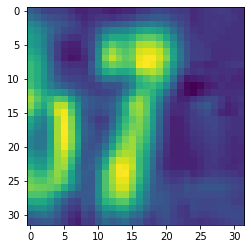

In [42]:
plt.imshow(test_pixels[-1].reshape((32),(32)))

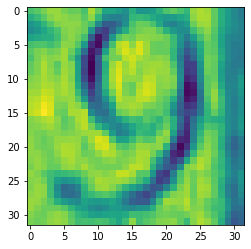

In [43]:
plt.imshow(train_pixels[-1].reshape((32),(32)))

## Create the test and train dataframes, using the labels

In [98]:
train_numpy_array=np.array(train_pixels)
test_numpy_array=np.array(test_pixels)

In [99]:
train_numpy_array.shape

(73257, 1024)

In [100]:
test_numpy_array.shape

(26032, 1024)

In [101]:
train_df = pd.DataFrame(train_numpy_array)
test_df = pd.DataFrame(test_numpy_array)

In [102]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,31,20,19,35,70,55,64,71,74,77,...,100,102,105,102,98,101,105,105,102,99
1,72,78,79,78,73,54,31,26,47,67,...,103,101,103,102,100,100,103,103,102,101
2,49,50,52,53,55,56,55,54,66,80,...,136,135,131,134,135,133,129,128,127,126
3,53,66,65,62,75,96,111,123,128,126,...,143,119,119,122,128,133,131,126,127,132
4,119,124,132,138,142,144,143,142,133,135,...,143,145,143,144,144,140,138,137,138,141


In [103]:
# add the labels
train_df['Label'] = train_data['y']

In [104]:
train_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Label
73252,39,38,35,33,32,30,32,31,36,36,...,24,25,39,39,31,33,34,28,30,2
73253,34,32,30,33,32,29,31,36,30,32,...,29,28,26,27,31,31,28,29,33,2
73254,86,89,106,143,182,189,187,196,209,222,...,217,213,216,214,210,212,218,217,211,1
73255,189,201,216,226,227,222,218,215,214,218,...,227,228,224,223,227,232,231,221,213,6
73256,217,220,225,230,230,225,222,223,217,232,...,213,227,233,229,221,208,186,174,179,9


In [105]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,80,81,81,81,79,79,82,83,81,81,...,91,92,89,88,88,89,89,88,88,89
1,138,138,138,137,137,136,136,135,137,138,...,128,130,123,123,125,122,113,108,118,133
2,161,164,166,167,171,173,168,160,156,157,...,175,174,167,168,166,166,165,164,164,164
3,141,138,136,136,140,144,145,144,147,149,...,114,108,108,112,118,121,122,128,139,147
4,178,177,176,177,177,177,174,172,170,167,...,152,157,165,169,176,181,183,181,178,176


In [106]:
test_df['Label'] = test_data['y']

In [107]:
test_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Label
26027,135,136,137,139,140,142,143,144,138,137,...,158,159,161,164,166,166,164,161,159,2
26028,141,142,142,142,142,142,142,141,137,135,...,158,155,161,164,162,161,163,163,161,2
26029,126,127,129,131,132,132,132,131,128,128,...,151,152,154,155,153,149,148,151,154,7
26030,73,72,70,69,67,68,68,68,72,73,...,77,86,93,101,102,102,101,95,88,6
26031,84,80,75,74,74,73,70,66,66,68,...,71,71,70,71,72,73,75,76,76,7


### Save dataframes as csv files

In [108]:
train_df.to_csv('Dataset//csv files//train.csv')

In [109]:
test_df.to_csv('Dataset//csv files//test.csv')

##  One-hot-encode the labels

In [110]:
train_targets = train_df['Label'].copy()

In [111]:
# change label of "10" for 0 with "0"
indices_with_10s_as_targets = train_targets_new.index[train_targets == 10]

In [112]:
indices_with_10s_as_targets

Int64Index([   52,    84,    93,    96,   108,   144,   182,   206,   215,
              218,
            ...
            73110, 73113, 73155, 73157, 73162, 73181, 73188, 73193, 73220,
            73239],
           dtype='int64', length=4948)

In [113]:
for index in indices_with_10s_as_targets:
    train_targets.iloc[index] = 0

In [114]:
train_targets.index[train_targets == 10]

Int64Index([], dtype='int64')

In [115]:
train_targets.index[train_targets == 0]

Int64Index([   52,    84,    93,    96,   108,   144,   182,   206,   215,
              218,
            ...
            73110, 73113, 73155, 73157, 73162, 73181, 73188, 73193, 73220,
            73239],
           dtype='int64', length=4948)

In [116]:
one_hot_targets_train=pd.get_dummies(train_targets)
one_hot_targets_train.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [117]:
#Possible normalization here, however the vectors should work just fine
#one_hot_target_all[one_hot_target_all==0] = 0.01 #replace all zeros (using a mask) with 0.01, same thinking applies below
#one_hot_target_all[one_hot_target_all==1] = 0.99

In [118]:
test_targets = test_df['Label'].copy()

In [119]:
indices_with_10s_as_targets = test_targets.index[test_targets == 10]

In [120]:
for index in indices_with_10s_as_targets:
    test_targets.iloc[index] = 0

In [121]:
one_hot_targets_test=pd.get_dummies(test_targets)
one_hot_targets_test.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [122]:
train_df.drop(['Label'],axis=1,inplace=True)
test_df.drop(['Label'],axis=1,inplace=True)

## Normalize pixel values

In [123]:
fac = 0.99 / 255
add_fac = 0.01

train_df = train_df.apply(lambda x: x*fac+add_fac)
test_df = test_df.apply(lambda x: x*fac+add_fac)


In [124]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.130353,0.087647,0.083765,0.145882,0.281765,0.223529,0.258471,0.285647,0.297294,0.308941,...,0.398235,0.406000,0.417647,0.406000,0.390471,0.402118,0.417647,0.417647,0.406000,0.394353
1,0.289529,0.312824,0.316706,0.312824,0.293412,0.219647,0.130353,0.110941,0.192471,0.270118,...,0.409882,0.402118,0.409882,0.406000,0.398235,0.398235,0.409882,0.409882,0.406000,0.402118
2,0.200235,0.204118,0.211882,0.215765,0.223529,0.227412,0.223529,0.219647,0.266235,0.320588,...,0.538000,0.534118,0.518588,0.530235,0.534118,0.526353,0.510824,0.506941,0.503059,0.499176
3,0.215765,0.266235,0.262353,0.250706,0.301176,0.382706,0.440941,0.487529,0.506941,0.499176,...,0.565176,0.472000,0.472000,0.483647,0.506941,0.526353,0.518588,0.499176,0.503059,0.522471
4,0.472000,0.491412,0.522471,0.545765,0.561294,0.569059,0.565176,0.561294,0.526353,0.534118,...,0.565176,0.572941,0.565176,0.569059,0.569059,0.553529,0.545765,0.541882,0.545765,0.557412


In [125]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.320588,0.324471,0.324471,0.324471,0.316706,0.316706,0.328353,0.332235,0.324471,0.324471,...,0.363294,0.367176,0.355529,0.351647,0.351647,0.355529,0.355529,0.351647,0.351647,0.355529
1,0.545765,0.545765,0.545765,0.541882,0.541882,0.538000,0.538000,0.534118,0.541882,0.545765,...,0.506941,0.514706,0.487529,0.487529,0.495294,0.483647,0.448706,0.429294,0.468118,0.526353
2,0.635059,0.646706,0.654471,0.658353,0.673882,0.681647,0.662235,0.631176,0.615647,0.619529,...,0.689412,0.685529,0.658353,0.662235,0.654471,0.654471,0.650588,0.646706,0.646706,0.646706
3,0.557412,0.545765,0.538000,0.538000,0.553529,0.569059,0.572941,0.569059,0.580706,0.588471,...,0.452588,0.429294,0.429294,0.444824,0.468118,0.479765,0.483647,0.506941,0.549647,0.580706
4,0.701059,0.697176,0.693294,0.697176,0.697176,0.697176,0.685529,0.677765,0.670000,0.658353,...,0.600118,0.619529,0.650588,0.666118,0.693294,0.712706,0.720471,0.712706,0.701059,0.693294


# LASTLY: Pickle the data and save it

In [126]:
import os
import pickle
with open(("Dataset//pickle files//pickled_shvt_full_data.pkl"), "bw") as fh:
    data = (train_df, test_df, one_hot_targets_train, one_hot_targets_test, train_data['y'], test_data['y'])
    pickle.dump(data, fh)